In [1]:
import copy
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt

# Logistic Regression Implementation

### General Description

Given an amount of input features, we want to be able to predict an output of either 0 or 1. For example, given characteristics of a Url, can we predict whether the URL will be a phishing (1) or non-phishing (0) url. In the logistic regression algorithm, the inputs are used to generate a value between 0 and 1 ($\hat{y}$). If $\hat{y}$ is greater than 0.5, we predict that the output will be 1. If $\hat{y}$ is less than or equal to 0.5, we predict the output to be 0.


To make our prediction, each of the inputs is given a weight for how much it will contribute to the overall output. Using the URL example, the length of the URL (x<sub>1</sub>) might be given a weight of 2 (w<sub>1</sub>) and the number of unique characters (x<sub>2</sub>) might be given a weight of 0.38 (w<sub>2</sub>). The goal for the algorithm is to find the optimal combination of weights. For our calculated prediction, we are also going to add parameter b, which will serve as a correction value just as b does in the equation $y=mx+b$
<br/><br/>

<center>So far, we have: $z=b+w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}...$ where z is our prediction.

However, we mentioned above that our prediction needs to have a value between 0 and 1, yet it is totally possible that our parameters (the weights and b) output a prediction z that is outside the range of 0 and 1. To address this issue, we need a function that will take in a parameter $z$ and output a value between 0 and 1. This is called our *activation function*.
<br/><br/>
<center>Our activation function is going to be the sigmoid function. The equation for sigmoid is:

<center>$s(z)=\frac{1}{1+e^{-z}}$

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
print("Sigmoid of [-0.6, 0, 2] = ", sigmoid(np.array([-0.6, 0, 2])))

Sigmoid of [-0.6, 0, 2] =  [0.35434369 0.5        0.88079708]


No matter what our input is for z, the sigmoid function ensures that our prediction value $\hat{y}$ will always be within [0,1]. We can generalize and say:
<center>$Z=w^{T}X+b$</center>
<center>$A=$sigmoid($Z$)</center>
<center>where Z is a list of every output z for every example and $A$ is a list of every prediction $\hat{y}$ for every z.

In the context of the URL example, $A$ would be a list of predicted values (0 or 1) for all URLs.
    
At this point, we can at least initialize W and b to start at values of 0. These values will change, but they need to start somewhere

In [3]:
def initialize_0(num_inputs):
    w = np.zeros((num_inputs, 1))
    b = float(0)
    return w, b

w_test, b_test = initialize_0(3)
print("w:\n", w_test, '\nb:',b_test)

w:
 [[0.]
 [0.]
 [0.]] 
b: 0.0


Here are some variable definitions for the purposes of the example, lets say that we have 4 examples, each with 3 features:
 - w is a list of weights for each feature. $w = [ [w_{1}], [w_{2}], [w_{3}] ]$
 - b is simply a float value. Example: $b=0.0$
 - X is a matrix of all inputs for each example.
 
$X= [[a, b, c, d], [e, f, g, h], [i, j, k, l]]$ --> X is length 3 for 3 features, each feature is length 4 for each example

X[0] contains $w_{1}$ for all four input examples. X[1] contains $w_{2}$ for all input examples, etc...

 - Y is a list of the labels for each of the examples. $y = [[1, 0, 0, 1]]$

 

In [4]:
def cost(A, Y):
    # our cost can be defined in different ways. For this example, cost is defined by the following:
    # A and Y are the same shape
    cost = -1 / Y.shape[1] * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost
    

In [31]:
Y = np.array([[0., 0., 1., 1.]])
X = np.array([[1., -2., -1., 2.], [3., 0.5, -3.2, 1.], [0.6, -2., -0.7, -0.1]])
w, b = initialize_0(X.shape[0])
cost(np.array([[.9, 0.3, 0.2, 0.8]]), Y)

1.1229603751702721

In [32]:
print("w shape: ", w.shape)
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

w shape:  (3, 1)
X shape:  (3, 4)
Y shape:  (1, 4)


<center>w is a (3, 1) matrix and X is a (3, 4) matrix. If we do $w^{T}X$ we output a (1, 4) matrix, which is the same shape as Y.
    
We also need to compute the partial derivatives for each variable. 
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [33]:
def propagate(w, b, X, Y):
    m = Y.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)
    # With our predictions A, we can calculate our cost using the cost function we described above
    c = cost(A, Y)

    #Now we have the cost for our current values of W. The ultimate goal is to minimize the cost function,
    #minimizing the cost function will make our model the best
    
    # dw and db are the partial derivatives for how much each variable affects the cost function
    # these derivatives were calculated through some calculus and complex math
    
    #dw is a list of derivatives for each weight. dw has a shape of 3, 1 (same shape as w) and db is just a float
    dw = 1 / m * np.dot(X, (A-Y).T)
    db = 1 / m * np.sum(A - Y)
    
    return dw, db, c
    

In [34]:
propagate(w,b,X,Y)

(array([[-0.25  ],
        [ 0.7125],
        [-0.075 ]]),
 0.0,
 0.6931471805599453)

### Optimize

Basically keep repeating the proagate function to optimize dw and db

If the rate of change of the cost function is negative as we increase w, then we want to increase w. 

In [35]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    for i in range(num_iterations):
        
        dw, db, c = propagate(w,b,X,Y)
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        #print('\r', "Cost after iteration ", i+1, ":\t", c, end='')
        costs.append(c)
    
    print("W: ", w)
    print("b: ", b)
    
    return w, b, costs
        
        


In [36]:
w_opt, b_opt, costs = optimize(w,b,X,Y, num_iterations=2000, learning_rate=0.003)

W:  [[ 1.08195827]
 [-1.16092169]
 [ 0.12983141]]
b:  0.22525827789092784


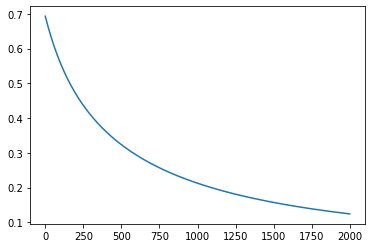

In [37]:
plt.plot(costs)

In [38]:
def predict(w, b, X):
    
    m = X.shape[1]
    y_pred = np.zeros((1, m))
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            y_pred[0, i] = 1
        else:
            y_pred[0,i] = 0
            
    return y_pred

In [39]:
predict(w_opt, b_opt, X)

array([[0., 0., 1., 1.]])